---
# DECISION TREES
Sind gute Klassifizierer, wenn es darum geht, dass die Entscheidungsfindung max. interpretierbar sein soll.<br>
Die Hauptaufgabe liegt darin, den Informationsgehalt zu maximieren. Bei `binären` Bäumen finden vornehmlich<br>
drei Maße für die Bewertung der Impurity Verwendung:<br>
`1. Entropie`:<br>
    Wechselseitigkeit im Baum wird max. --> wie viele Objekte gehören zu Klasse 1, wie viele zu Klasse 2, usw. -> Entropie ist NULL, wenn alle Elemente zu nur einer Klasse gehören<br>
    Entropie wird hingegen max., wenn also Klassen gleich viele Objekte haben = Entropie ist max. wenn viele Infos zu allen Klassen vorhanden sind<br>
<br>
`2. GINI Koeffizient`:<br>
    Maß, in wieweit Wahrscheinlichkeit einer Fehlklassifizierung minimiert werden kann.<br>
    Ebenfalls wie Entropie maximal, wenn die Klassen perfekt durchgemischt sind.<br>
    `In der Praxis liefern Entropie und GINI Koeffizient sehr ähnliche Ergebnisse: oft kein Mehrwert sehr viel Zeit in die Auswertung dieser Impurity Kriterien zu stecken!`<br>
<br>
`3. Klassifikationsfehler`:<br>
nützliches Kriterium für das `Pruning` eines Entscheidungsbaumes (Zu hohe Tiefe des Baumes führt zu viel mehr Rechenaufwand und kann auch zu Überanpassung führen, weshalb man<br>
die Tiefe begrenzen sollte). Dieses Kriterium hat aber keinen so entscheidenden Einfluss auf die Konstruktion des Baumes, weshalb auch die Verteilung der Klassen usw. nicht so<br>
streng zu sehen sind (es ist weniger empfindlich auf die Änderung von Klassen)

---
## Um diese drei Kriterien besser visuell vergleichen zu können, ploten wir die Impurity-Indizes der Klasse 1 für das Wahrscheinlichkeitsintervall [0,1]
Den GINI-Koeffizienten skallieren wir auf 1/2, damit visuell klar wird, dass dieses zwischen der Entropie und dem Klassifikationsfehler liegt

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1- (1-p))

def entropy(p):
    return - p * np.log2(p) - (1-p) * (np.log2(1-p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent    = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*.5 if e else None for e in ent]
err    = [error(i) for i in x]

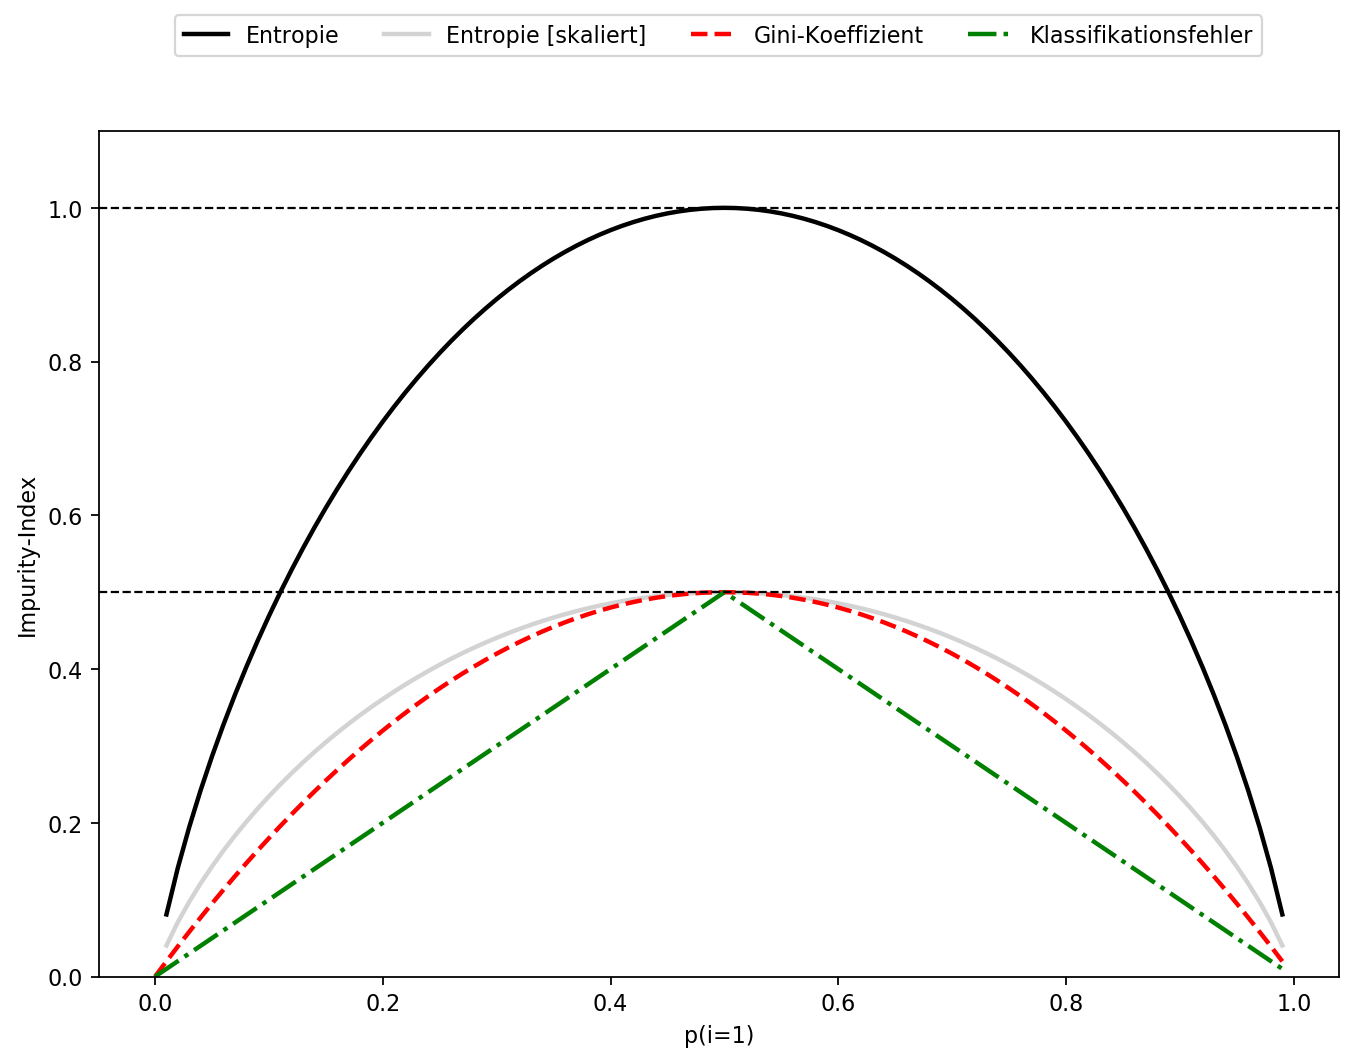

In [3]:
fig = plt.figure(figsize=(10,7), dpi=160)
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], ['Entropie', 'Entropie [skaliert]', 'Gini-Koeffizient', 'Klassifikationsfehler'], ['-', '-', '--', '-.'], ['black', 'lightgrey', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc="upper center", bbox_to_anchor=(.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity-Index')
plt.show()

---
# ANWENDUNG DECISION TREE AUF IRIS DATENSATZ
### Man sollte die Baumtiefe im Auge behalten, weil man sonst Probleme mit Überanpassung bekommen kann.

In [4]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print("Shape von X: ", X.shape)
print("Feature-Names: ", iris.feature_names)
y = iris.target
print("Shape von y: ", y.shape)
print("Names zu den Klassen: ", iris.target_names)
print("Klassenbezeichnungen als Zahlen: ", np.unique(y))
print("Shape von X/y: ", X.shape, " / ", y.shape)

Shape von X:  (150, 2)
Feature-Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape von y:  (150,)
Names zu den Klassen:  ['setosa' 'versicolor' 'virginica']
Klassenbezeichnungen als Zahlen:  [0 1 2]
Shape von X/y:  (150, 2)  /  (150,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3, stratify=y)
print("Bezeichner in y: ",     np.bincount(y))
print("Bezeichner in train: ", np.bincount(y_train))
print("Bezeichner in test: ",  np.bincount(y_test))

Bezeichner in y:  [50 50 50]
Bezeichner in train:  [35 35 35]
Bezeichner in test:  [15 15 15]


---
## MODEL ANWENDUNG

In [7]:
def plot_decision_regions(X :np.array, y :np.array, classifier: DecisionTreeClassifier, test_idx=None, resolution=.005):
    # Markierungen und Farben
    markers = ('s', 'x', 'o', 'v', '^')
    colors  = ("red", "green", "blue", "lightgreen", "cyan")
    cmap    = ListedColormap(colors[:len(np.unique(y))])
    print("in 'start' plot_regions[X-shape=", X.shape, "], y-shape=[", y.shape, "]")

    # Plotten Entscheidungsgrenze
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # MODEL PREDICT für TEST-DATENMENGE
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(10,7), dpi=160)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Exemplare
    for idx, cl in enumerate(np.unique(y)):
        print("Index: ", idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=iris.target_names[cl],
                    edgecolors='hotpink')
    
    # Exemplare der Testdatenmenge hervorheben -> wir kreisen diese Punkte explizit ein
    if test_idx:
        print("in 'test_idx' in plot_regions[X-shape=", X.shape, "], y-shape=[", y.shape, "]")
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], 
                    X_test[:,1],
                    c='',
                    edgecolors='hotpink',
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100,
                    label='Testdaten')


In [8]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
print("Shape von X_combined: ", X_combined.shape, ", und y_combined: ", y_combined.shape)

Shape von X_combined:  (150, 2) , und y_combined:  (150,)


in 'start' plot_regions[X-shape= (150, 2) ], y-shape=[ (150,) ]
Index:  0
Index:  1
Index:  2
in 'test_idx' in plot_regions[X-shape= (150, 2) ], y-shape=[ (150,) ]


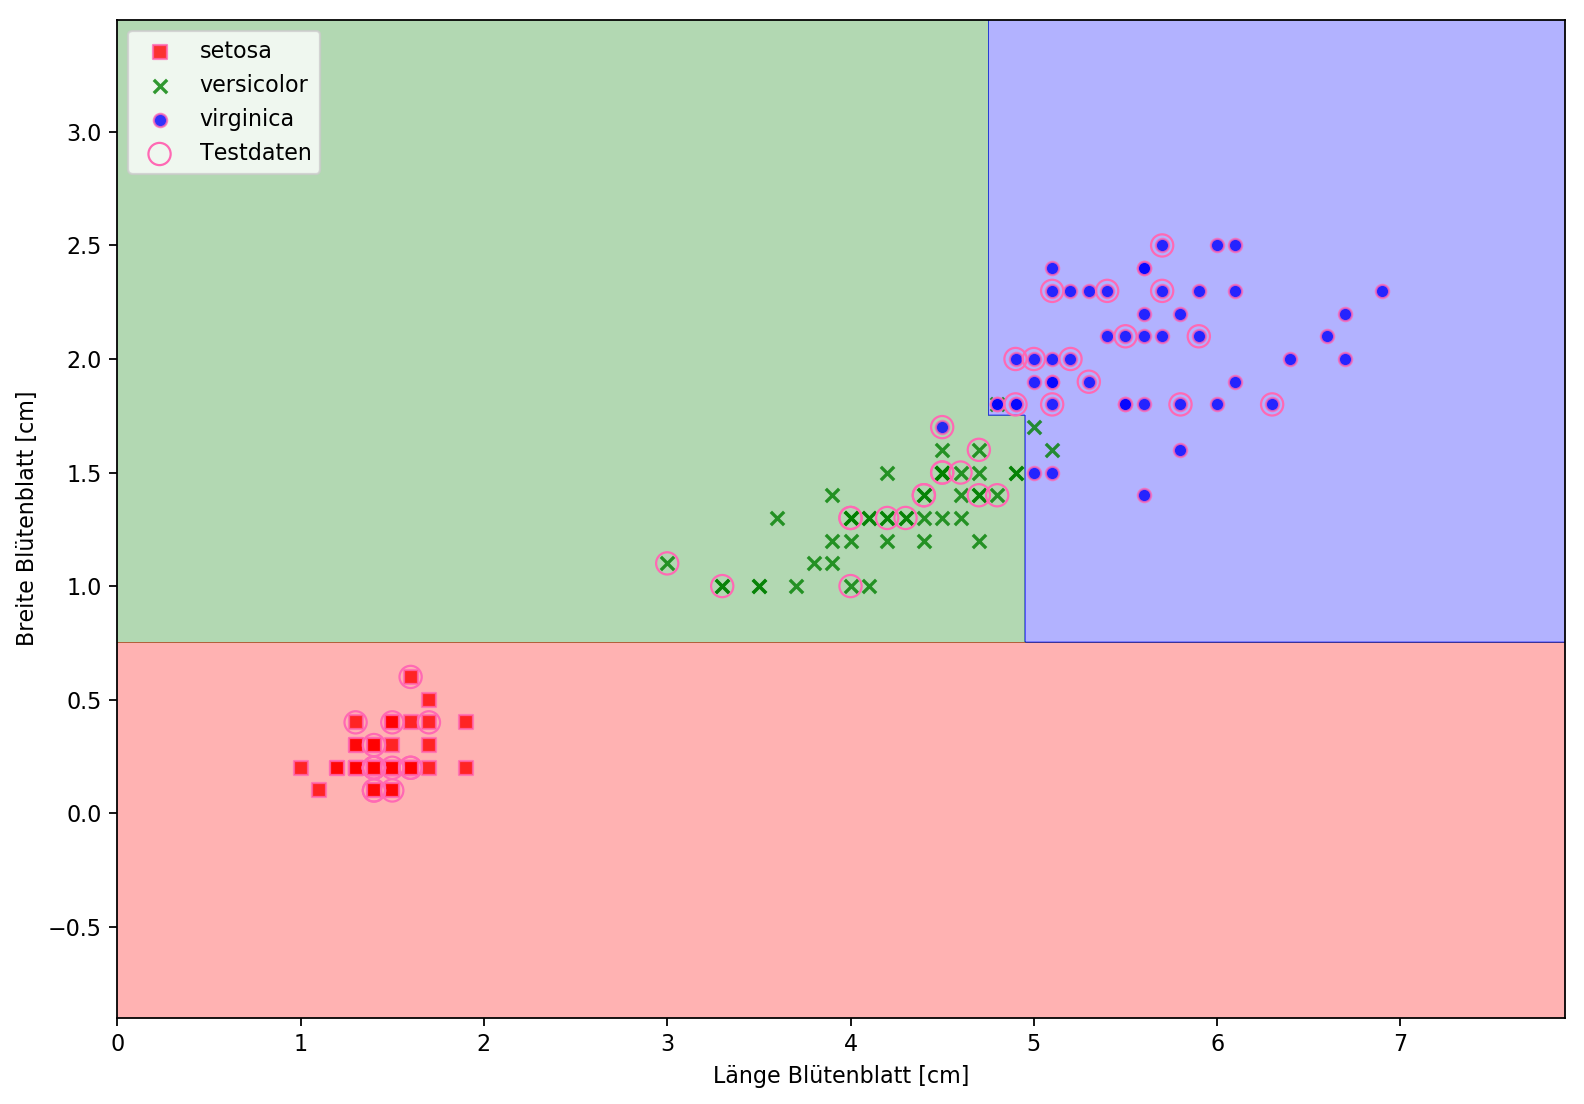

In [9]:
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel("Länge Blütenblatt [cm]")
plt.ylabel("Breite Blütenblatt [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

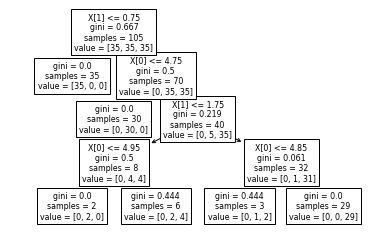

In [10]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

### Eine visuell ansprechendere Version erhält man mit Pydotplus

In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=iris.target_names, feature_names=["Blütenblattlänge", "Blütenblattbreite"], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png("..\\decision_tree_output.png") # Wird lokal auf PC gespeichert

True

### INTERPRETATION
Aufteilung der Trainingsdaten: Wurzel = 105 Exemplare: Aufteilung anhand des Kriteriums "Länge Blütenblatt" <= 0,75cm  --> 2 Kind-Knoten:<br>
[1] `GINI-Koeffizient 0.0` = Aufteilung von 35 Samples der Klasse SETOSA = korrekt und fertig (siehe auch Scatter-Plot oben mit den Testdaten)<br>
[2] der zweite Knoten nimmt sich nun der Klassen `VERSICOLOR` und `VIRGINICA` an. Hier gibt es in beiden Klassen wenige Fehler<br>
    Von `VERSICOLOR` kann er 30 Samples mit GINI=0.0 komplett sicher korrekt zuordnen, und noch einmal zwei weitere Samples mit GINI=0.0.<br>
    `VERGINICA` schafft er 29 Samples mit GINI=0.0 also eindeutig korrekt!<br> 
<br>
Beim Rest der Samples kommt es Unsicherheiten zwischen `VERGINICA` und `VERSICOLOR` und GINI=0.444

---
# VERSUCH DIE MAX-DEPTH ZU BRENZEN AUF DREI TIEFEN-EBENEN

In [12]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)  # hier auf drei Ebenen einstellen
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
print("Shape von X_combined: ", X_combined.shape, ", und y_combined: ", y_combined.shape)

Shape von X_combined:  (150, 2) , und y_combined:  (150,)


in 'start' plot_regions[X-shape= (150, 2) ], y-shape=[ (150,) ]
Index:  0
Index:  1
Index:  2
in 'test_idx' in plot_regions[X-shape= (150, 2) ], y-shape=[ (150,) ]


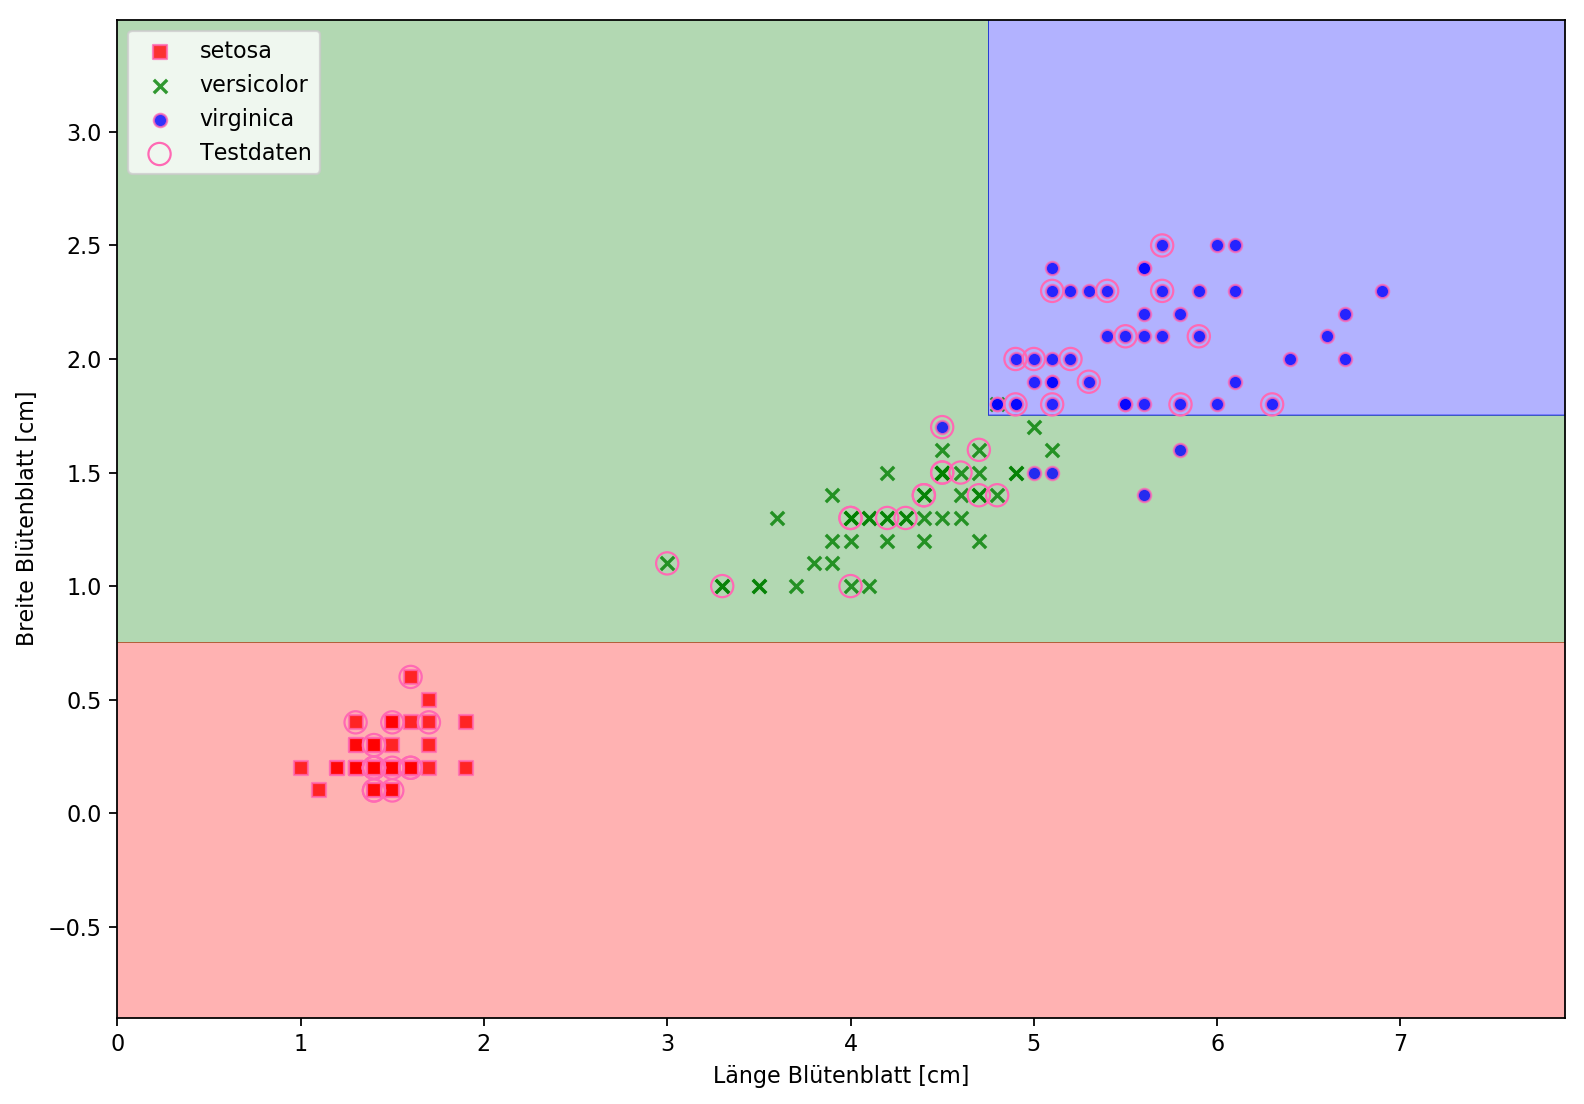

In [13]:
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel("Länge Blütenblatt [cm]")
plt.ylabel("Breite Blütenblatt [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

---
# RANDOM FOREST
Combination of several trees - put together in kind of an ensamble-technic to have more stable and robust classifications<br>
We create a tree ensamble of 25 trees on 2 jobs

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

in 'start' plot_regions[X-shape= (150, 2) ], y-shape=[ (150,) ]
Index:  0
Index:  1
Index:  2
in 'test_idx' in plot_regions[X-shape= (150, 2) ], y-shape=[ (150,) ]


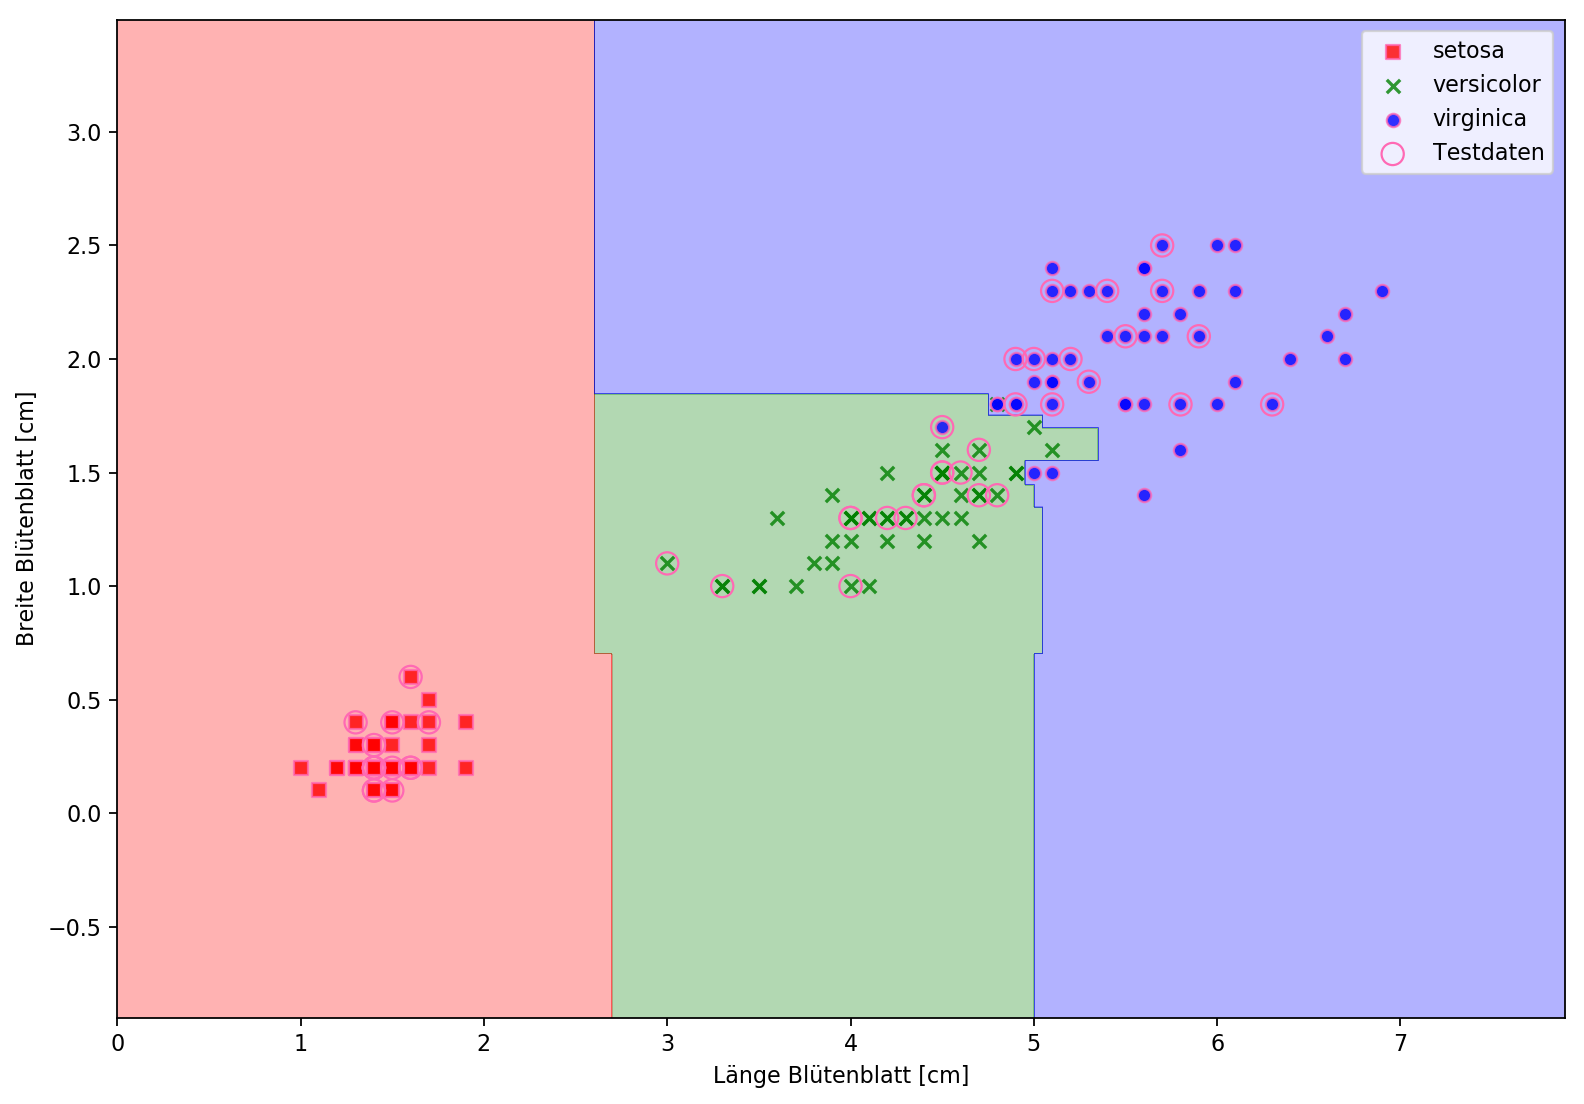

In [20]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel("Länge Blütenblatt [cm]")
plt.ylabel("Breite Blütenblatt [cm]")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### The result is a really good representation of the data as shown above